In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [65]:
df = pd.read_csv("data_files/lifeExpectancyData.csv")
df.head()

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness1-19Years,Thinness5-9Years,IncomeCompositionOfResources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [66]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   LifeExpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   InfantDeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   PercentageExpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  underFiveDeaths               2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

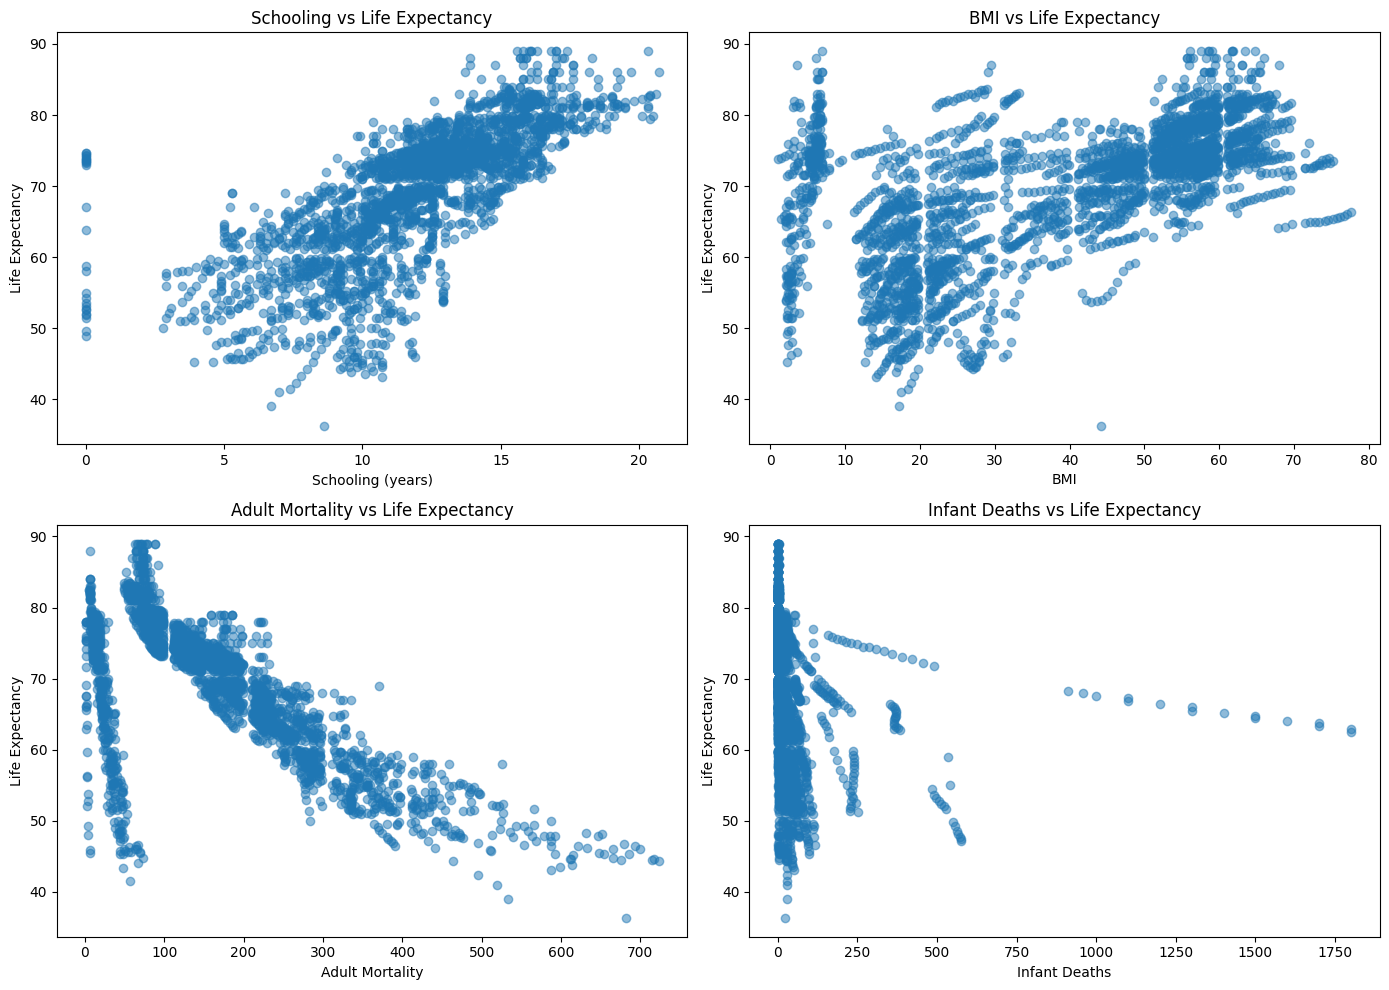

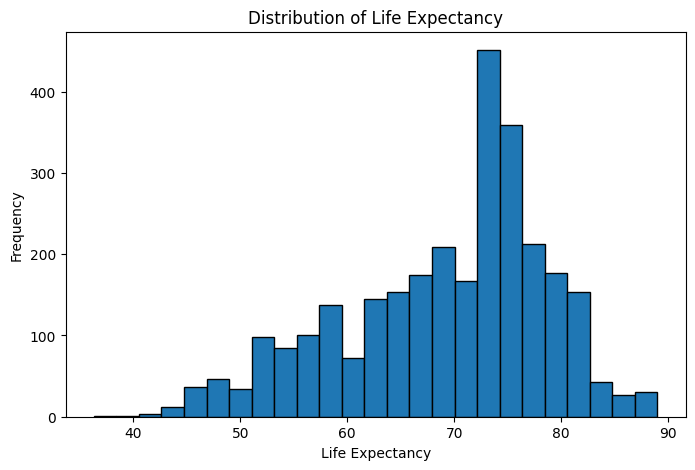

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].scatter(df['Schooling'], df['LifeExpectancy'], alpha=0.5)
axs[0, 0].set_title('Schooling vs Life Expectancy')
axs[0, 0].set_xlabel('Schooling (years)')
axs[0, 0].set_ylabel('Life Expectancy')
# More years of schooling are linked to longer life expectancy

axs[0, 1].scatter(df['BMI'], df['LifeExpectancy'], alpha=0.5)
axs[0, 1].set_title('BMI vs Life Expectancy')
axs[0, 1].set_xlabel('BMI')
axs[0, 1].set_ylabel('Life Expectancy')
# High BMI values associated with shorter life expectancy

axs[1, 0].scatter(df['AdultMortality'], df['LifeExpectancy'], alpha=0.5)
axs[1, 0].set_title('Adult Mortality vs Life Expectancy')
axs[1, 0].set_xlabel('Adult Mortality')
axs[1, 0].set_ylabel('Life Expectancy')
# Higher adult mortality lowers life expectancy

axs[1, 1].scatter(df['InfantDeaths'], df['LifeExpectancy'], alpha=0.5)
axs[1, 1].set_title('Infant Deaths vs Life Expectancy')
axs[1, 1].set_xlabel('Infant Deaths')
axs[1, 1].set_ylabel('Life Expectancy')
# More infant deaths reduce life expectancy

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(df['LifeExpectancy'].dropna(), bins=25, edgecolor='black')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()
# Most life expectancy values are between 60 and 80 years


In [68]:
life_numeric = df.drop(columns=['Country', 'Status'])
life_clean = life_numeric.dropna()
y = life_clean['LifeExpectancy']
x = life_clean.drop(columns=['LifeExpectancy'])

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234)
model = LinearRegression()
model.fit(x_train, y_train)

intercept = model.intercept_
coefficients = model.coef_
score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)

(intercept, coefficients, score, mae)

(np.float64(322.78514830071936),
 array([-1.34185134e-01, -1.69541156e-02,  1.00762986e-01, -7.71954998e-02,
         3.72677397e-04, -1.90442776e-03, -1.42958769e-05,  2.85272324e-02,
        -7.61363829e-02,  9.28581332e-03,  1.28415807e-01,  1.02778411e-02,
        -4.44785227e-01,  2.64609894e-05,  2.82788796e-10, -2.86921181e-02,
        -3.30236553e-02,  1.02677459e+01,  8.47425397e-01]),
 0.8353642720784663,
 2.7456228586070455)

In [94]:
life_numeric = df.drop(columns=['Country', 'Status'])

# Fill missing values with median
life_filled = life_numeric.fillna(life_numeric.median(numeric_only=True))

# Keep only features with correlation >= 0.2
correlations = life_filled.corr(numeric_only=True)['LifeExpectancy']
strong_corr_features = correlations[correlations.abs() >= 0.2].index.drop('LifeExpectancy')

# Prepare data
x = life_filled[strong_corr_features]
y = life_filled['LifeExpectancy']

# 25% training size
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=1234)

# Train model
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = model.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)

print("Accuracy:", round(score * 100, 2), "%")
print("Mean Absolute Error:", round(mae, 2))

# Tried different settings, nothing increased the accuracy near 85%, only bumped by 1 or 2 points.


Accuracy: 81.22 %
Mean Absolute Error: 3.0
